In [108]:
# EDA for capstone 2, including lists of highest-scoring words, list of lowest-scoring words, word clouds, ...
#...histogram of word frequency, and probabilities associated with individual words

In [187]:
# Imports
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import OOP_pickle_util
from OOP_pickle_util import save_tweet_words
from OOP_pickle_util import load_word_probs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import plotly.graph_objects as go
import scipy.stats
from pipeline_capstone2 import Make_Pipeline
import warnings; warnings.simplefilter('ignore')


In [110]:
# load the preprocessor instance including attributes, most importantly the preprocessed DF containing the ...
#...full sarcasm data training data

pre_inst_s = OOP_pickle_util.load_preprocessor_instance('preprocessor_instance_pickled') 
            

In [111]:
# Assign the preprocessor df containing the full sarcasm training data

df = pre_inst_s.df

# Check the working DF
df.iloc[0:30]


,political_score,text33,tweet_cat,original_tweet,text34,text35,text36,text_final
0,0.488090,deep state dems continue attack machine anything stop,1,b'RT @TribulationThe: Deep State Dems continue to ATTACK EACH OTHER! BUST OUT POPCORN!!! \xf0\...,"[deep, state, dems, continue, attack, machine, anything, stop]","[deep, state, dems, continue, attack, machine, anything, stop]",8,deep state dems continue attack machine anything stop
7,0.359033,would see would ban stay h,1,"b'RT @TribulationThe: Only in Leftist, Kommie Kalifornia, would you see such HATRED such as this...","[would, see, would, ban, stay, h]","[would, see, would, ban, stay]",5,would see would ban stay
11,0.017664,really wrong,1,"b""RT @TribulationThe: Really, Joe, didn't Hillary lose? Just gotta wonder what is wrong with Sl...","[really, wrong]","[really, wrong]",2,really wrong
12,0.471981,budget proposes trillion cut includes,1,b'RT @Tipsy_in_Texas: #Trump\xe2\x80\x99s budget proposes over \n$1 TRILLION in cuts to #Medicai...,"[budget, proposes, trillion, cut, includes]","[budget, proposes, trillion, cut, includes]",5,budget proposes trillion cut includes
13,0.242621,proposed billion cut billion cut billion social security cut,1,"b'RT @BetteMidler: #Trump has proposed $756 billion in Medicare cuts, $920 billion in Medicaid c...","[proposed, billion, cut, billion, cut, billion, social, security, cut]","[proposed, billion, cut, billion, cut, billion, social, security, cut]",9,proposed billion cut billion cut billion social security cut
24,0.488090,deep state dems continue attack machine anything stop,1,b'RT @TribulationThe: Deep State Dems continue to ATTACK EACH OTHER! BUST OUT POPCORN!!! \xf0\...,"[deep, state, dems, continue, attack, machine, anything, stop]","[deep, state, dems, continue, attack, machine, anything, stop]",8,deep state dems continue attack machine anything stop
28,0.242621,proposed billion cut billion cut billion social security cut,1,"b'RT @BetteMidler: #Trump has proposed $756 billion in Medicare cuts, $920 billion in Medicaid c...","[proposed, billion, cut, billion, cut, billion, social, security, cut]","[proposed, billion, cut, billion, cut, billion, social, security, cut]",9,proposed billion cut billion cut billion social security cut
29,0.242621,proposed billion cut billion cut billion social security cut,1,"b'RT @BetteMidler: #Trump has proposed $756 billion in Medicare cuts, $920 billion in Medicaid c...","[proposed, billion, cut, billion, cut, billion, social, security, cut]","[proposed, billion, cut, billion, cut, billion, social, security, cut]",9,proposed billion cut billion cut billion social security cut
33,0.471981,budget proposes trillion cut includes,1,b'RT @Tipsy_in_Texas: #Trump\xe2\x80\x99s budget proposes over \n$1 TRILLION in cuts to #Medicai...,"[budget, proposes, trillion, cut, includes]","[budget, proposes, trillion, cut, includes]",5,budget proposes trillion cut includes
37,0.315667,someone asked worse reelected reelected trump,1,b'RT @BeholdIsrael: Someone just asked me what\xe2\x80\x99s worse - #Trump re-elected and #Neta...,"[someone, asked, worse, reelected, reelected, trump]","[someone, asked, worse, reelected, reelected, trump]",6,someone asked worse reelected reelected trump


In [112]:
# Inspect the DF

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48662 entries, 0 to 209876
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   political_score  48662 non-null  float64
 1   text33           48662 non-null  object 
 2   tweet_cat        48662 non-null  int64  
 3   original_tweet   48662 non-null  object 
 4   text34           48662 non-null  object 
 5   text35           48662 non-null  object 
 6   text36           48662 non-null  int64  
 7   text_final       48662 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ MB


In [113]:
len(df)

48662

In [114]:
# Count the number of tweets classified as either sarcastic(one) or non-sarcstic (zero)

df.tweet_cat.value_counts()


1    28220
0    20442
Name: tweet_cat, dtype: int64

In [115]:
# create a new column that converts the preprocessed tweet text column into a list to enable manipulation of tweet...
#... text contents such as counting the number of words in each tweet after preprocessing
    
df['lst_words'] = df['text_final'].apply(lambda x: x.split())


In [116]:
# create a new column that counts the list of preprocessed tweet text words for each row
    
df['num_words'] = df['lst_words'].apply(lambda x: len(x))


In [117]:
# Verify the recent changes to the working DF 'df'
    
df.head(3)


,political_score,text33,tweet_cat,original_tweet,text34,text35,text36,text_final,lst_words,num_words
0,0.488090,deep state dems continue attack machine anything stop,1,b'RT @TribulationThe: Deep State Dems continue to ATTACK EACH OTHER! BUST OUT POPCORN!!! \xf0\...,"[deep, state, dems, continue, attack, machine, anything, stop]","[deep, state, dems, continue, attack, machine, anything, stop]",8,deep state dems continue attack machine anything stop,"[deep, state, dems, continue, attack, machine, anything, stop]",8
7,0.359033,would see would ban stay h,1,"b'RT @TribulationThe: Only in Leftist, Kommie Kalifornia, would you see such HATRED such as this...","[would, see, would, ban, stay, h]","[would, see, would, ban, stay]",5,would see would ban stay,"[would, see, would, ban, stay]",5
11,0.017664,really wrong,1,"b""RT @TribulationThe: Really, Joe, didn't Hillary lose? Just gotta wonder what is wrong with Sl...","[really, wrong]","[really, wrong]",2,really wrong,"[really, wrong]",2


In [118]:
# Compute summary statistics for the numerical columns of the working DF
    
df.describe()


,political_score,tweet_cat,text36,num_words
count,48662.000000,48662.000000,48662.000000,48662.000000
mean,0.357757,0.579919,6.015865,6.015865
std,0.116511,0.493577,3.687579,3.687579
min,-0.176550,0.000000,1.000000,1.000000
25%,0.291451,0.000000,3.000000,3.000000
50%,0.386167,1.000000,6.000000,6.000000
75%,0.449955,1.000000,8.000000,8.000000
max,0.499994,1.000000,28.000000,28.000000


In [119]:
# Count the total number of words in the preprocessed text

sum(df.num_words)


292744

In [120]:
# Count the total number of words and the total number of unique words in the preprocessed sarcasm data

# Create an empty list 
Row_list =[] 

# Iterate over each row 
for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.text_final] 

    # append the list to the final list 
    Row_list.append(my_list) 

# Combine all nested lists into a single list    
flat_list = []
for sublist in Row_list:
    for item in sublist:
        flat_list.append(item)

# Combine the list of strings into a single string        
flat_join = " ".join(flat_list)

# Convert the single large string into a single list
words_lst = flat_join.split()

print("There are ",len(words_lst),"words in the sarcasm data.")
print("There are ", len(set(words_lst)),"unique words in the sarcasm data")


There are  292744 words in the sarcasm data.
There are  14970 unique words in the sarcasm data


In [121]:
# Change zeros to 'Non-sarcastic' and ones to 'Sarcastic' in the 'tweet_cat' column to facilitate creation of figures below

df = df.replace({'tweet_cat': {0: 'Non-sarcastic', 1: 'Sarcastic'}})


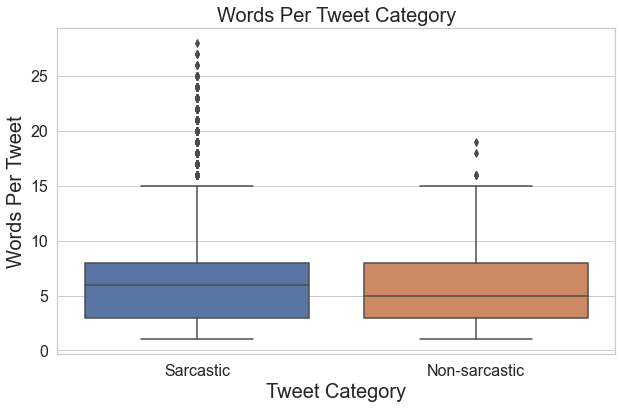

In [122]:
# Paired boxplot comparing values in the 'tweet_cat' column : 'Sarcastic' vs. 'Non-sarcastic'

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.boxplot(x = df['tweet_cat'],y=df["num_words"])
ax.axes.set_title("Words Per Tweet Category",fontsize=20)
ax.set_xlabel("Tweet Category",fontsize=20)
ax.set_ylabel("Words Per Tweet",fontsize=20)
ax.tick_params(labelsize=16)
plt.savefig('Tweet_category_boxplot.png')


In [123]:
# Compute summary statistics for each level in the 'tweet_cat' column - 'Sarcastic' and 'Non-sarcastic'

df.groupby('tweet_cat').describe().unstack(1)

# https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns

                        tweet_cat    
political_score  count  Non-sarcastic    20442.000000
                        Sarcastic        28220.000000
                 mean   Non-sarcastic        0.347235
                        Sarcastic            0.365379
                 std    Non-sarcastic        0.118941
                        Sarcastic            0.114117
                 min    Non-sarcastic       -0.169538
                        Sarcastic           -0.176550
                 25%    Non-sarcastic        0.275273
                        Sarcastic            0.302717
                 50%    Non-sarcastic        0.372731
                        Sarcastic            0.396015
                 75%    Non-sarcastic        0.443235
                        Sarcastic            0.453502
                 max    Non-sarcastic        0.499986
                        Sarcastic            0.499994
text36           count  Non-sarcastic    20442.000000
                        Sarcastic        282

In [124]:
# t-test comparing mean number of words between sarcastic and non-sarcastic tweet
    
sarc_tweet_num_words = df.where(df.tweet_cat=='Sarcastic').dropna()['num_words']
non_sarc_tweet_num_words = df.where(df.tweet_cat=='Non-sarcastic').dropna()['num_words']
scipy.stats.ttest_ind(sarc_tweet_num_words,non_sarc_tweet_num_words)

# Reference: https://stackoverflow.com/questions/45015038/how-to-t-test-by-group-in-a-pandas-dataframe

Ttest_indResult(statistic=32.50707359358684, pvalue=2.446882193942657e-229)

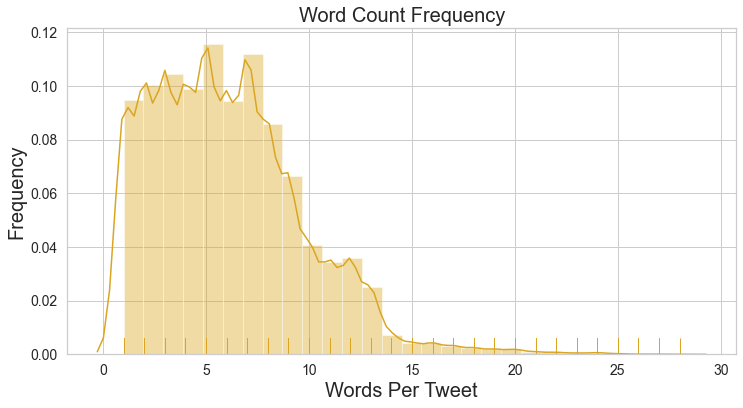

In [133]:
# Generate a probability density function for the number of words per tweet
    
plt.figure(figsize=(12,6))
sns.distplot(df.num_words, bins=28, kde=True, hist=True, norm_hist =True, rug=True, color='goldenrod')
plt.title('Word Count Frequency', fontsize=20)
plt.yticks(fontsize= 14)
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Words Per Tweet', fontsize = 20)
plt.xticks(fontsize=14)
plt.savefig('word_count_freq.png')


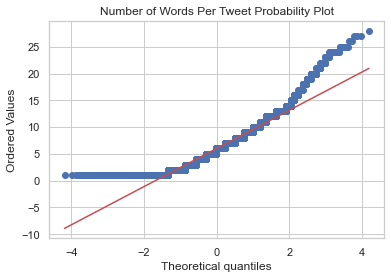

In [134]:
# Check for normality of the number of words per tweet 'num_words" using a Q-Q plot
    
scipy.stats.probplot(df.num_words, dist='norm', fit=True, plot=plt)
plt.title('Number of Words Per Tweet Probability Plot')
plt.savefig('WordsPerTweetQQPlot.png')


In [136]:
# Compute the modal values of the 'num_words' column of the working df

df.num_words.mode()


0    5
dtype: int64

In [120]:
# Count the total number of words and the total number of unique words in the preprocessed sarcasm data

# Create an empty list 
Row_list =[] 

# Iterate over each row 
for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.text_final] 

    # append the list to the final list 
    Row_list.append(my_list) 

# Combine all nested lists into a single list    
flat_list = []
for sublist in Row_list:
    for item in sublist:
        flat_list.append(item)

# Combine the list of strings into a single string        
flat_join = " ".join(flat_list)

# Convert the single large string into a single list
words_lst = flat_join.split()

print("There are ",len(words_lst),"words in the sarcasm data.")
print("There are ", len(set(words_lst)),"unique words in the sarcasm data")


There are  292744 words in the sarcasm data.
There are  14970 unique words in the sarcasm data


In [154]:
words_lst[0:10]

['deep',
 'state',
 'dems',
 'continue',
 'attack',
 'machine',
 'anything',
 'stop',
 'would',
 'see']

In [161]:
# Combine all tweets into one string in order to count the total number of words in all rows of the preprocessed tweet...
#... column 'text30'
        
all_tweet_words = " ".join(tweet for tweet in df.text_final)
print ("There are {} characters in the combination of all tweets.".format(len(all_tweet_words)))


There are 1948077 characters in the combination of all tweets.


In [138]:
df.head(2)

,political_score,text33,tweet_cat,original_tweet,text34,text35,text36,text_final,lst_words,num_words
0,0.488090,deep state dems continue attack machine anything stop,Sarcastic,b'RT @TribulationThe: Deep State Dems continue to ATTACK EACH OTHER! BUST OUT POPCORN!!! \xf0\...,"[deep, state, dems, continue, attack, machine, anything, stop]","[deep, state, dems, continue, attack, machine, anything, stop]",8,deep state dems continue attack machine anything stop,"[deep, state, dems, continue, attack, machine, anything, stop]",8
7,0.359033,would see would ban stay h,Sarcastic,"b'RT @TribulationThe: Only in Leftist, Kommie Kalifornia, would you see such HATRED such as this...","[would, see, would, ban, stay, h]","[would, see, would, ban, stay]",5,would see would ban stay,"[would, see, would, ban, stay]",5


In [162]:
# Find the frequency of each word in a string. To be used to count the occurrence of individual words in all the...
#... preprocessed tweet text

def count_words(words):   
        word_freq = {}       # create an empty dictionary 
        lst = words.split()  # split the words parameter (which is a string) into individual strings and place inside a list 
        for elements in lst:
        #for elements in words:
                # check if each word has '.' at its last. If so then ignore '.' 
            if elements[-1] == '.': 
                elements = elements[0:len(elements) - 1] 
                # if there already exists a key as "elements" then simply # increase its value. 
            if elements in word_freq: 
                word_freq[elements] += 1
                # if the dictionary does not have the key as "elements" then create a key "elements" and assign its value to 1. 
            else: 
                word_freq.update({elements: 1}) 

        return word_freq # return the updated dictionary

# Reference: https://www.geeksforgeeks.org/find-frequency-of-each-word-in-a-string-in-python/

In [163]:
# Count the occurrence of each word in the preprocessed tweet text for all the tweet text and place inside a ...
#... new dictionary
    
word_freq = count_words(all_tweet_words)

# Sort the new dictionary in descending order
word_freq_ordered = {k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse = True)}

# Reference: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [164]:
# Create a new dictionary for the top 20 most-frequently-occurring words in the preprocessed tweet text data
    
word_freq_top20 = dict(itertools.islice(word_freq_ordered.items(),20))

# Reference: https://www.tutorialspoint.com/How-to-truncate-a-Python-dictionary-at-a-given-length

In [165]:
word_freq_top30 = dict(itertools.islice(word_freq_ordered.items(),30))
word_freq_top30

{'get': 3908,
 'one': 3382,
 'like': 2449,
 'could': 2163,
 'time': 2108,
 'candidate': 2028,
 'would': 1990,
 'people': 1932,
 'take': 1760,
 'say': 1730,
 'go': 1692,
 'let': 1631,
 'trump': 1629,
 'need': 1627,
 'see': 1610,
 'know': 1519,
 'stop': 1499,
 'running': 1414,
 'look': 1402,
 'please': 1362,
 'think': 1319,
 'end': 1249,
 'wait': 1186,
 'thing': 1183,
 'back': 1161,
 'name': 1161,
 'want': 1159,
 'even': 1145,
 'going': 1128,
 'vote': 1124}

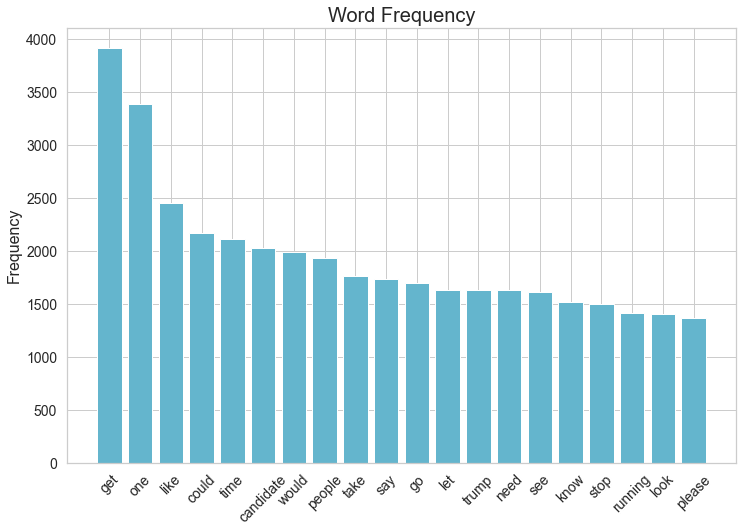

In [166]:
# Create a bar chart of the top 20 most-frequently-occurring words in the preprocessed tweet text data
    
labels, values = zip(*word_freq_top20.items())
plt.figure(figsize=(12,8))
words_hist = plt.bar(labels, values, color = 'c')
plt.title('Word Frequency', fontsize = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(rotation = 45, fontsize=16)
plt.xticks(fontsize=14)
plt.savefig('words_hist.png')


In [170]:
# Create a list of unique words from the 'word_freq' dictionary keys
    
word_freq_lst = list(word_freq.keys())

# Pickle the list of unique words occuring in the preprocessed text tweet data. This allows it to be unpickled and used...
#.... in the 'pred_word_probs' method of 'pipeline_capstone2.py'. This method produces DFs with sarcasm scores for...
#... individual words, which is useful to show for EDA purposes
save_tweet_words(word_freq_lst)

# Count the number of unique words in the preprocessed tweet text data
len(word_freq_lst)

14970

In [168]:
# Instantiate a class 'Make_Pipeline' instance, call the 'pred_word_probs' methods and check the DF attribute

pipe_test = Make_Pipeline()
pipe_test.pred_word_probs(word_freq_lst)
pipe_test.df.head(3)


,text,prob_sarc,prob_sarc2
0,[resist],"[[0.048327717009665205, 0.9516722829903348]]",0.951672
1,[belt],"[[0.05495771153131557, 0.9450422884686844]]",0.945042
2,[rose],"[[0.0669572720087468, 0.9330427279912532]]",0.933043


In [171]:
# Check the attributes of the class 'Make_Pipeline' instance

pipe_test.__dict__.keys()


dict_keys(['vectorizer', 'classifier', 'nb_classifier', 'largest_ave_score', 'largest_username', 'lowest_ave_score', 'lowest_username', 'largest_score', 'largest_tweet', 'lowest_score', 'lowest_tweet', 'average_scores', 'tweets_df', 'df', 'mean_sarc_score', 'median_sarc_score', 'df_nb'])

In [172]:
# Check the tail of the DF for the words with low scores

pipe_test.df.tail(10)


,text,prob_sarc,prob_sarc2
14960,[birthday],"[[0.9289635712295917, 0.07103642877040829]]",0.071036
14961,[switched],"[[0.9289846747061268, 0.07101532529387322]]",0.071015
14962,[bidens],"[[0.9340657824916654, 0.06593421750833459]]",0.065934
14963,[whirlwind],"[[0.9363733688776084, 0.0636266311223917]]",0.063627
14964,[bernies],"[[0.9405445012165845, 0.05945549878341547]]",0.059455
14965,[timing],"[[0.9522840321896145, 0.0477159678103854]]",0.047716
14966,[pandemic],"[[0.9637244276689519, 0.03627557233104802]]",0.036276
14967,[coronavirus],"[[0.9653813846881837, 0.034618615311816286]]",0.034619
14968,[prepared],"[[0.9688232623781168, 0.031176737621883274]]",0.031177
14969,[biden],"[[0.9780931080477314, 0.021906891952268567]]",0.021907


In [173]:
# Alternative approach to creating a class 'Make_Pipeline' instance is to pickle the list of unique words, unpickle it using Ipython and call ...
#...the 'pred_word_probs'method, pickle the 'Make_Pipeline' instance and then unpickle it again in this notebook
# Unpickle the DF of individual words and their scores quantified by the 'pred_word_probs' method of 'pipeline_capstone2.py'
    
#words_rank = OOP_pickle_util.load_word_probs('word_probs_pickled')


In [192]:
# Rename the DF attribute of the class 'Make_Pipeline' attribute

word_ranks = pipe_test.df

# Check the DF
word_ranks.head(2)

,text,prob_sarc,prob_sarc2
0,[resist],"[[0.048327717009665205, 0.9516722829903348]]",0.951672
1,[belt],"[[0.05495771153131557, 0.9450422884686844]]",0.945042


In [193]:
# Retain only the columns in DF 'word_ranks' needed to create tables showing the most-sarcastic and least-sarcastic words based on multinomial naive Bayes
    
word_ranks = word_ranks[['text','prob_sarc2']]

# Check the modified DF - 'words_rank'    
word_ranks.head(2)


,text,prob_sarc2
0,[resist],0.951672
1,[belt],0.945042


In [194]:
# Convert the 'text' column from a list to a string
    
word_ranks['text'] = [''.join(map(str, l)) for l in word_ranks['text']]

# Verify changes to the working DF 'words_rank'
word_ranks.head(2)

# Reference: https://stackoverflow.com/questions/45306988/column-of-lists-convert-list-to-string-as-a-new-column

,text,prob_sarc2
0,resist,0.951672
1,belt,0.945042


In [195]:
# Round the values in the 'prob_sarc2' column
    
word_ranks['prob_sarc2'] = word_ranks['prob_sarc2'].apply(lambda x: round((x),4))

# Verify changes to the working DF 'words_rank'
word_ranks.head(2)


,text,prob_sarc2
0,resist,0.9517
1,belt,0.9450


In [196]:
# Rename column titles in the working DF 'word_ranks'
    
word_ranks = word_ranks.rename(columns = {'text':'word','prob_sarc2':'sarcasm probability'})

# Verify changes to the working DF 'words_rank'
word_ranks.head(2)


,word,sarcasm probability
0,resist,0.9517
1,belt,0.9450


In [197]:
# Reset the index in the working DF 'word_ranks'
    
word_ranks = word_ranks.reset_index()

# Verify changes to the working DF 'words_rank'
word_ranks.head(2)


,index,word,sarcasm probability
0,0,resist,0.9517
1,1,belt,0.9450


In [198]:
# Remove the 'index' column from the working DF 'word_ranks'
    
del word_ranks['index']

# Verify changes to the working DF 'words_rank'
word_ranks.head(2)


,word,sarcasm probability
0,resist,0.9517
1,belt,0.9450


In [199]:
# Create a new DF consisting of the first 20 rows of the DF 'word_ranks'
    
most_sarc_words = word_ranks.iloc[:20]

# Check the new DF 'most_sarc_words'
most_sarc_words


,word,sarcasm probability
0,resist,0.9517
1,belt,0.9450
2,rose,0.9330
3,relax,0.9301
4,king,0.9293
5,attempted,0.9265
6,ramping,0.9071
7,sentencing,0.9045
8,journalism,0.8942
9,anticipated,0.8861


In [200]:
# Create a new DF from the last 20 rows of the DF 'word_ranks'

least_sarc_words = word_ranks.iloc[-20:]

# Check the new DF 'low_ranks'
least_sarc_words


,word,sarcasm probability
14950,aside,0.0852
14951,maga,0.0838
14952,conducted,0.0833
14953,math,0.0825
14954,testing,0.0806
14955,walked,0.0790
14956,brazile,0.0780
14957,reported,0.0779
14958,phony,0.0722
14959,schumer,0.0717


In [201]:
# Sort the rows of the DF 'least_sarc_words' in descending order

least_sarc_words = least_sarc_words.sort_values(by='sarcasm probability',ascending=True)

# Verify the changes to the DF 'low_ranks'
least_sarc_words


,word,sarcasm probability
14969,biden,0.0219
14968,prepared,0.0312
14967,coronavirus,0.0346
14966,pandemic,0.0363
14965,timing,0.0477
14964,bernies,0.0595
14963,whirlwind,0.0636
14962,bidens,0.0659
14961,switched,0.0710
14960,birthday,0.0710


In [202]:
# Convert the highest-scoring words DF 'top_ranks' into an excel file for copying into the Word-format report

most_sarc_words.to_excel("most_sarc_words.xlsx")


In [203]:
# Convert the lowest-scoring words DF 'low_ranks' into an excel file for copying into the Word-format report

least_sarc_words.to_excel("least_sarc_words.xlsx")


In [204]:
# Open the image to use as a mask

duh_mask = np.array(Image.open('C:/Users/sinua/Documents/Data_Science_Coding/Springboard/Capstone2/duh_image.png'))
duh_mask

# Reference: https://www.datacamp.com/community/tutorials/wordcloud-python

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [205]:
# Change array values from 0 to 255 because the masking function requires all white parts of the mask to have the value 255

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
# Reference: https://www.datacamp.com/community/tutorials/wordcloud-python

In [206]:
# Transform the mask into a new one that will work with the function

transformed_duh_mask = np.ndarray((duh_mask.shape[0],duh_mask.shape[1]), np.int32)

for i in range(len(duh_mask)):
    transformed_duh_mask[i] = list(map(transform_format, duh_mask[i]))

# Reference: https://www.datacamp.com/community/tutorials/wordcloud-python

In [207]:
# Check the expected result of your mask

transformed_duh_mask

# Reference: https://www.datacamp.com/community/tutorials/wordcloud-python

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [216]:
# Combine all the words in the list 'words_lst' into a single string to use as an argument to construct a wordcloud

all_words = ' '.join(tweet for tweet in words_lst)

# Check the new string created

all_words[0:20]


'deep state dems cont'

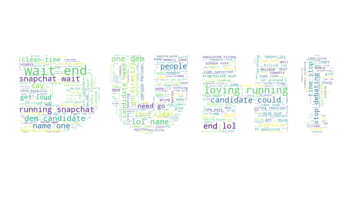

In [218]:
# Display the word cloud

wc = WordCloud(stopwords=STOPWORDS, 
               mask=transformed_duh_mask, background_color="white",
               max_words=2000, max_font_size=50,
               random_state=42, width=transformed_duh_mask.shape[1],
               height=transformed_duh_mask.shape[0])
wc.generate(all_words)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
wc.to_file('duh_wc.png')

# Reference: https://www.datacamp.com/community/tutorials/wordcloud-python